In [1]:
import numpy as np
import pandas as pd
import sklearn
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from keras.initializers import RandomNormal
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras import regularizers
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.


In [2]:
def feature_engr(train_set, test_set):
    '''
    Taking the raw training and test sets, and cleaning them
    up so that they can be used in training a model
    
    Parameters
    ----------
    train_set: pandas dataframe
        training set read in from pandas
    test_set: pandas dataframe
        test set read in from pandas
    
    Returns
    -------
    train_scaled, test_scaled, y_train, y_test
        feature engineered and cleaned up sets   
    '''
    train_set =train_set.dropna()
    test_set = test_set.dropna()
   
    
    combined = pd.concat([train_set, test_set], axis=0).reset_index(drop=True)
    
    combined.loc[combined.target == ' >50K', 'target']=1
    combined.loc[combined.target==' <=50K', 'target']=0
    combined.loc[combined.target==' <=50K.', 'target']=0
    combined.loc[combined.target == ' >50K.', 'target']=1
    
       
    dummies = pd.get_dummies(combined)
    
    ts = len(train_set)
    ts2 = len(test_set)
    
    train_set = dummies[0:ts]
    test_set = dummies[ts:]
    
    y_train = train_set['target']
    y_test = test_set['target']
    
    train_set = train_set.drop(["target"], axis=1)
    test_set = test_set.drop(["target"], axis=1)
    
    std_scaler = StandardScaler()
    std_scaler.fit(train_set)
    train_scaled = std_scaler.transform(train_set)
    test_scaled = std_scaler.transform(test_set)
    

    return train_scaled, test_scaled, y_train, y_test

In [3]:
columns=['age', 'workclass','fnlwgt','education','education-num','marital-status','occupation',
         'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'target']
test_set = pd.read_csv("../input/adult.test.txt", index_col=False, names=columns, na_values=[' ?'])

columns=['age', 'workclass','fnlwgt','education','education-num','marital-status','occupation',
         'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'target']
train_set = pd.read_csv("../input/adult.data.txt", index_col=False, names=columns,na_values=[' ?'])

In [4]:
train_scaled, test_scaled, y_train, y_test = feature_engr(train_set, test_set)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:46: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:47: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


In [5]:
dim = train_scaled.shape
batch_size = 128
epochs = 50


In [6]:
def build_model():
    '''
    Building a basic sequential model, with me just guessing basically
    
    Parameters
    ----------
    
    
    Returns
    -------
    compiled neural net
    '''
    
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(dim[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    model.compile(loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(lr=.004),
    metrics=['accuracy'])
    
    return model

In [7]:
mod = build_model()
history = mod.fit(train_scaled, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               31872     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)  

24129/24129 [==============================] - 2s 73us/step - loss: 0.2560 - acc: 0.8787 - val_loss: 0.3486 - val_acc: 0.8425
Epoch 45/50
24129/24129 [==============================] - 2s 74us/step - loss: 0.2573 - acc: 0.8783 - val_loss: 0.3483 - val_acc: 0.8430
Epoch 46/50
24129/24129 [==============================] - 2s 73us/step - loss: 0.2547 - acc: 0.8801 - val_loss: 0.3504 - val_acc: 0.8445
Epoch 47/50
24129/24129 [==============================] - 2s 73us/step - loss: 0.2537 - acc: 0.8799 - val_loss: 0.3566 - val_acc: 0.8407
Epoch 48/50
24129/24129 [==============================] - 2s 74us/step - loss: 0.2565 - acc: 0.8798 - val_loss: 0.3522 - val_acc: 0.8402
Epoch 49/50
24129/24129 [==============================] - 2s 73us/step - loss: 0.2528 - acc: 0.8796 - val_loss: 0.3582 - val_acc: 0.8407
Epoch 50/50
24129/24129 [==============================] - 2s 72us/step - loss: 0.2535 - acc: 0.8791 - val_loss: 0.3575 - val_acc: 0.8435


In [8]:
score = mod.evaluate(test_scaled, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

15060/15060 [==============================] - 1s 62us/step
Test loss: 0.36920518081185033
Test accuracy: 0.8371181938594398


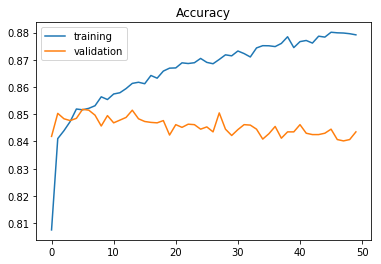

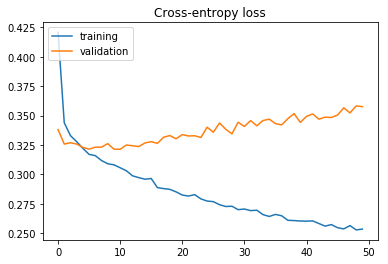

In [9]:
def plot_accuracies_and_losses(history):
    plt.title('Accuracy')
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()
    
    plt.title('Cross-entropy loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()

plot_accuracies_and_losses(history)